In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from warnings import filterwarnings

In [2]:
# Load the dataset
dataset = pd.read_csv("diabetes.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Display basic info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Check for missing values
missing_values = dataset.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [7]:
# Fill missing values with median for numerical columns
dataset['Glucose'].fillna(dataset['Glucose'].median(), inplace=True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace=True)

In [8]:
from scipy import stats

In [9]:
z_scores = np.abs(stats.zscore(dataset[['Glucose', 'BloodPressure', 'BMI']]))
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
dataset = dataset[~outliers]

In [10]:
# Check for duplicates and remove them
dataset.drop_duplicates(inplace=True)

In [11]:
# Reset the index after data manipulation
dataset.reset_index(drop=True, inplace=True)

In [12]:
# Save the cleaned dataset to a new CSV file
dataset.to_csv("cleaned_diabetes.csv", index=False)

In [13]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.00000,721.000000
mean,3.877947,121.790569,72.302358,21.332871,84.313454,32.347295,0.471721,33.38835,0.342580
std,3.363460,30.736501,12.281088,15.653989,117.074852,6.641613,0.324603,11.77493,0.474902
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.00000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.245000,24.00000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.300000,0.378000,29.00000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.000000,36.600000,0.626000,41.00000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,55.000000,2.329000,81.00000,1.000000


In [14]:
from matplotlib import pyplot as plt

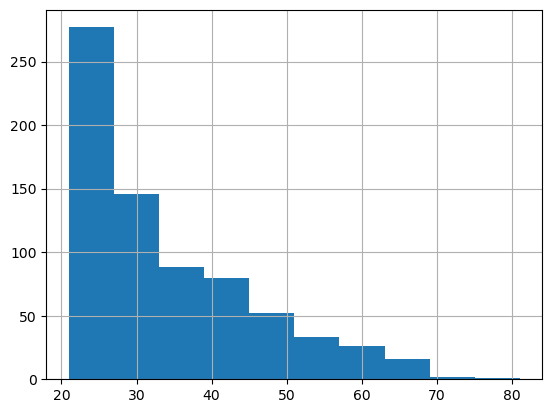

In [15]:
dataset["Age"].hist()
plt.show()

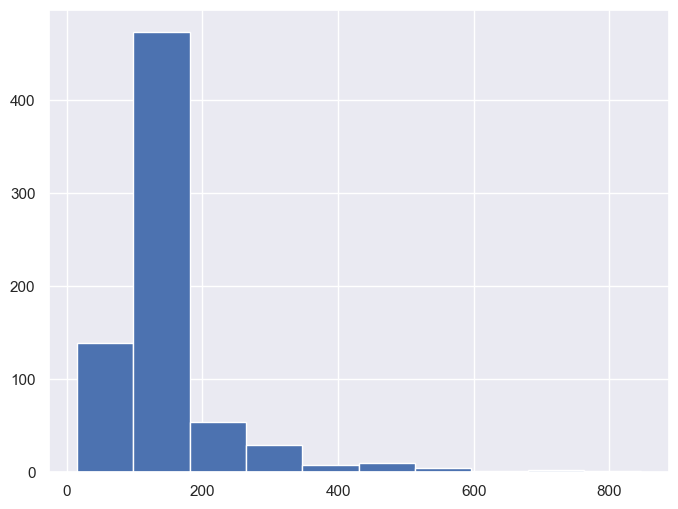

In [35]:
dataset["Insulin"].hist()
plt.show()

In [16]:
# Impute missing values
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_impute:
    dataset[column].replace(0, np.nan, inplace=True)
    median_value = dataset[column].median()
    dataset[column].fillna(median_value, inplace=True)

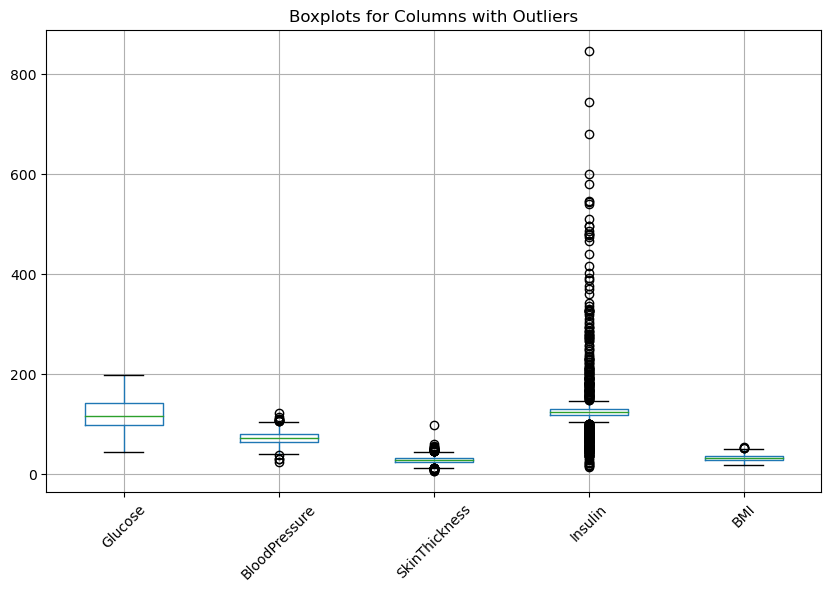

In [17]:
# Check for outliers using box plots
plt.figure(figsize=(10, 6))
dataset.boxplot(column=columns_to_impute)
plt.title("Boxplots for Columns with Outliers")
plt.xticks(rotation=45)
plt.show()

In [18]:
import warnings

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


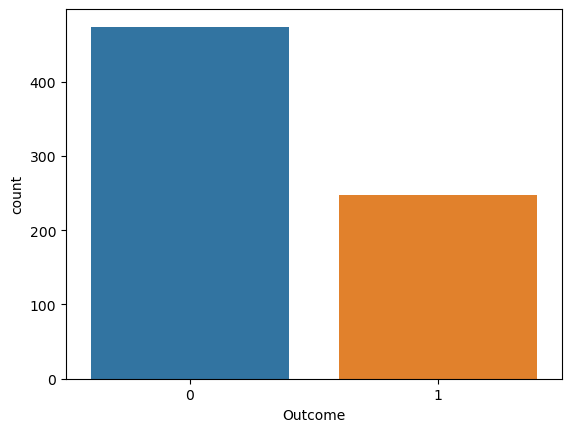

In [19]:
sns.countplot(dataset["Outcome"])
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


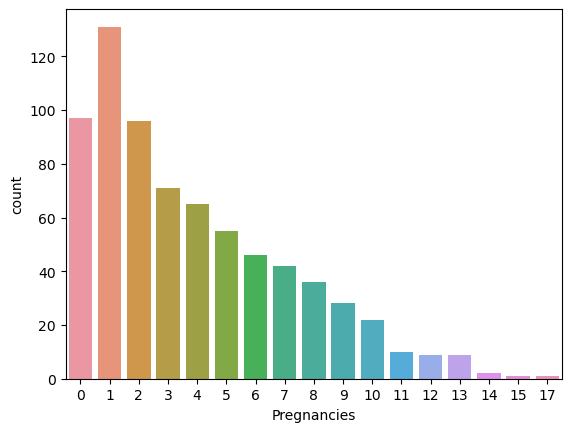

In [20]:
sns.countplot(dataset["Pregnancies"],label="Count")
plt.show()

In [21]:
Y=dataset.iloc[:,8]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

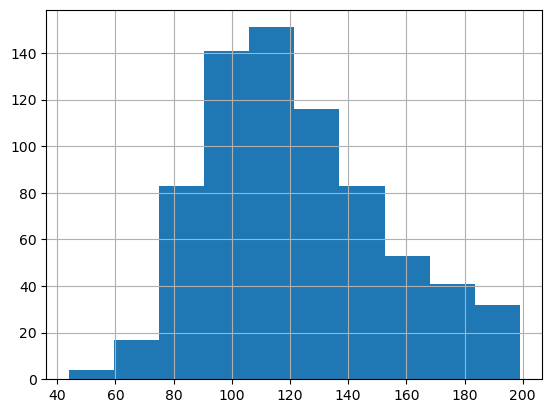

In [22]:
dataset["Glucose"].hist()
plt.show()

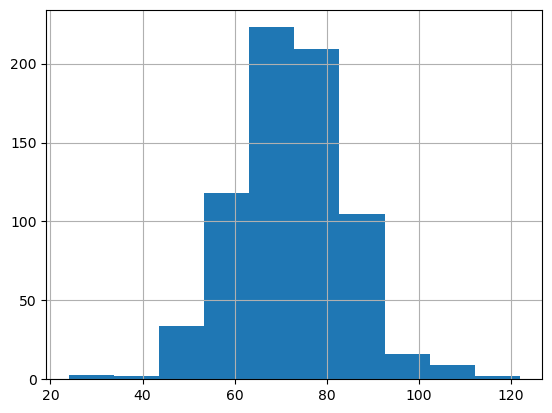

In [23]:
dataset["BloodPressure"].hist()
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


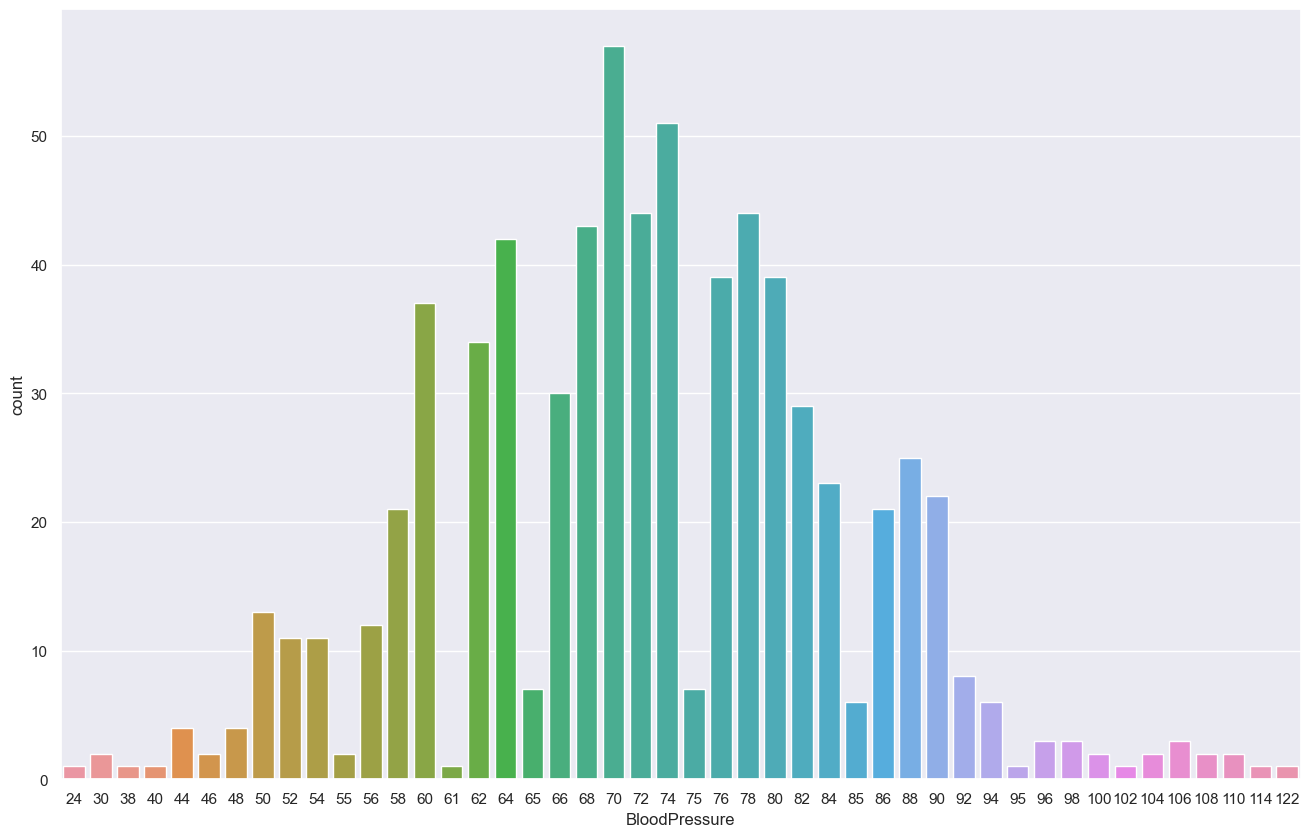

In [37]:
plt.figure(figsize = (16,10))
ax = sns.countplot(dataset['BloodPressure'])

In [25]:
# split dataset
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [26]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

576
576
145
145


In [27]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [28]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [29]:
# Fit Model
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [30]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [31]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[83 18]
 [14 30]]
0.6521739130434783


In [32]:
# Assuming y_test contains the actual labels and y_pred contains the predicted labels
print(accuracy_score(y_test, y_pred))

0.7793103448275862
